## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [21]:
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

### Data Exploration

In [81]:
# factor_dict_dir_path = Path('..\\Data\\Materials_1\\factor_dictionaries\\')
factor_dict_dir_path = Path('..\\Data\\Materials_1\\factor_dictionaries_temp\\')
os.listdir(factor_dict_dir_path)

['CoS2_factor_dict.pkl',
 'Cr2O3_factor_dict.pkl',
 'CrPbO4_factor_dict.pkl',
 'Fe2O3_factor_dict.pkl',
 'LiMnP_factor_dict.pkl',
 'MnO_factor_dict.pkl',
 'NiO_factor_dict.pkl',
 'Sr2CuO3_factor_dict.pkl',
 'TmNiC2_factor_dict.pkl',
 'V2O5_factor_dict.pkl',
 'Y2TiO5_factor_dict.pkl',
 'ZnS_factor_dict.pkl']

In [79]:
# CoS2 Factor Dictionaries

with open(Path('..\\Data\\Materials_1\\factor_dictionaries\\') / 'CoS2_factor_dictionary.txt', 'rb') as file:
    CoS2 = pickle.load(file)
print(CoS2.keys())

for key, val in CoS2.items():
    print(key, val)

with open(Path('..\\Data\\Materials_1\\factor_dictionaries_temp\\') / 'CoS2_factor_dict.pkl', 'rb') as file:
    CoS2 = pickle.load(file)
print(CoS2.keys())

for key, val in CoS2.items():
    print(key, val)

dict_keys(['Material', 'Steinhart Vector', 'Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'quadrupole moment', 'quadrupole moment normalized'])
Material CoS2
Steinhart Vector ([0.026923139384568175, 3.562684099915903e-18, 0.001815416798598674, 6.6787601789609585e-18, 0.020362629920496835, 1.2736755761031287e-17, 0.010238640661916671, 1.2816402922153213e-17, 0.018779294740504375, 2.1917955476639138e-17, 0.012299585387824725], 'CoS2')
Steinhart Parameter Sum 0.09041870689390952
band_gap 0.0
oxidation_state 4
possible_species ['Co4+', 'S2-']
density 4.849095401441955
quadrupole moment [[ 3.55271368e-15  4.36054258e+00  4.36054258e+00]
 [ 4.36054258e+00 -1.06581410e-14  4.36054258e+00]
 [ 4.36054258e+00  4.36054258e+00  7.10542736e-15]]
quadrupole moment normalized [[ 2.22044605e-16  2.72533911e-01  2.72533911e-01]
 [ 2.72533911e-01 -6.66133815e-16  2.72533911e-01]
 [ 2.72533911e-01  2.72533911e-01  4.44089210e-16]]
dict_keys(['Material', 'steinhar

In [137]:
# NiO Factor Dictionaries

with open(Path('..\\Data\\Materials_1\\factor_dictionaries\\') / 'NiO_factor_dictionary.txt', 'rb') as file:
    CoS2 = pickle.load(file)
print(CoS2.keys())

for key, val in CoS2.items():
    print(key, val)

with open(Path('..\\Data\\Materials_1\\factor_dictionaries_temp\\') / 'NiO_factor_dict.pkl', 'rb') as file:
    CoS2 = pickle.load(file)
print(CoS2.keys())

for key, val in CoS2.items():
    print(key, val)

dict_keys(['Material', 'Steinhart Vector', 'Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'quadrupole moment', 'quadrupole moment normalized'])
Material NiO
Steinhart Vector ([0.05971806970302172, 2.5238569752968746e-18, 3.205181827553336e-18, 6.94773959373283e-18, 0.04561042912845768, 7.959563508097789e-18, 0.021113526023188785, 1.254672578666575e-17, 0.04288177406741662, 1.3998835170241773e-17, 0.024569528796514205], 'NiO')
Steinhart Parameter Sum 0.19389332771859907
band_gap 2.3008999999999995
oxidation_state 2
possible_species ['Ni2+', 'O2-']
density 6.762154477618838
quadrupole moment [[ 7.10542736e-15 -8.45490862e-15 -3.21936787e-15]
 [-8.45490862e-15  7.10542736e-15 -3.21936787e-15]
 [-3.21936787e-15 -3.21936787e-15  7.10542736e-15]]
quadrupole moment normalized [[ 8.88178420e-16 -1.05686358e-15 -4.02420984e-16]
 [-1.05686358e-15  8.88178420e-16 -4.02420984e-16]
 [-4.02420984e-16 -4.02420984e-16  8.88178420e-16]]
dict_keys(['Material', '

In [66]:
anisotropy_matrix_path = Path("..\\Data\\Materials_1\\feff_runs\\anisotropy_data.csv")
anisotropy_matrix = pd.read_csv(anisotropy_matrix_path)
anisotropy_matrix.set_index('parent_dir', inplace=True)
anisotropy_matrix.index = [name.split('_')[0] for name in anisotropy_matrix.index]
anisotropy_matrix.index.name = 'Material'
print(anisotropy_matrix.head())

          m00       m01       m02       m10  m11       m12       m20  \
Material                                                               
Y2TiO5    0.0  0.432346  0.428979  0.432346  0.0  0.239362  0.428979   
V2O5      0.0  0.123250  0.436309  0.123250  0.0  0.511185  0.436309   
Cr2O3     0.0  0.000008  0.112632  0.000008  0.0  0.112626  0.112632   
CrPbO4    0.0  0.127756  0.066659  0.127756  0.0  0.097652  0.066659   
LiMnP     0.0  0.000001  0.208893  0.000001  0.0  0.208893  0.208893   

               m21  m22  
Material                 
Y2TiO5    0.239362  0.0  
V2O5      0.511185  0.0  
Cr2O3     0.112626  0.0  
CrPbO4    0.097652  0.0  
LiMnP     0.208893  0.0  


#### Material Dictionary Formatting

In [80]:
data_list = []

# for file_path in factor_dict_dir_path.glob('*.txt'):
for file_path in factor_dict_dir_path.glob('*.pkl'):
    with open(file_path, 'rb') as file:
        material_dict = pickle.load(file)

        # Extract individual values, keeping only numerical stuff
        material = material_dict['Material']
        # steinhart_vector = material_dict['Steinhart Vector'][0]  # Just the vector, ignoring the material name
        steinhart_vector = material_dict['steinhart_vector'][0]  # Just the vector, ignoring the material name
        # steinhart_param_sum = material_dict['Steinhart Parameter Sum']
        steinhart_param_sum = material_dict['steinhart_parameter_sum']
        band_gap = material_dict['band_gap']
        oxidation_state = material_dict['oxidation_state']
        possible_species = len(material_dict['possible_species'])
        density = material_dict['density']
        quadrupole_moment = material_dict['quadrupole moment'].flatten()  # Flatten matrix to vector
        quadrupole_moment_norm = material_dict['quadrupole moment normalized'].flatten()

        # Combine all the features into a single row (list)
        data_row = [
            material,
            *steinhart_vector,  # Unpack vector values
            steinhart_param_sum,
            band_gap,
            oxidation_state,
            possible_species,
            density,
            *quadrupole_moment,  # Unpack matrix values
            *quadrupole_moment_norm  # Unpack normalized matrix values
        ]
        
        data_list.append(data_row)

# Define the column names
columns = ['Material'] + [f"ST {i}" for i in range(11)] # Steinhart vector values from 0 to 10
columns += ['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']
columns += [f'QM {i}' for i in range(9)] # Flattened quadrupole matrix
columns += [f'QM Norm {i}' for i in range(9)] # Flattened quadrupole matrix (normalized)

print(columns)

factor_df = pd.DataFrame(data_list, columns=columns)
factor_df.set_index('Material', inplace=True)

print(factor_df)

['Material', 'ST 0', 'ST 1', 'ST 2', 'ST 3', 'ST 4', 'ST 5', 'ST 6', 'ST 7', 'ST 8', 'ST 9', 'ST 10', 'Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'QM 0', 'QM 1', 'QM 2', 'QM 3', 'QM 4', 'QM 5', 'QM 6', 'QM 7', 'QM 8', 'QM Norm 0', 'QM Norm 1', 'QM Norm 2', 'QM Norm 3', 'QM Norm 4', 'QM Norm 5', 'QM Norm 6', 'QM Norm 7', 'QM Norm 8']
              ST 0      ST 1          ST 2      ST 3      ST 4      ST 5  \
Material                                                                   
CoS2      0.010994  0.009207  6.073949e-03  0.002372  0.001222  0.003568   
Cr2O3     0.042921  0.029984  1.648971e-02  0.012966  0.012229  0.016532   
CrPbO4    0.075711  0.001022  3.375536e-03  0.056248  0.038469  0.006866   
Fe2O3     0.042079  0.029416  1.631405e-02  0.012791  0.011982  0.016237   
LiMnP     0.021069  0.019036  1.586493e-02  0.013389  0.013441  0.015427   
MnO       0.056338  0.042516  3.243903e-02  0.041027  0.047773  0.043019   
NiO       0.

In [74]:
print(factor_df.head())
print(factor_df.columns)

              ST 0      ST 1      ST 2      ST 3      ST 4      ST 5  \
Material                                                               
CoS2      0.010994  0.009207  0.006074  0.002372  0.001222  0.003568   
Cr2O3     0.042921  0.029984  0.016490  0.012966  0.012229  0.016532   
CrPbO4    0.075711  0.001022  0.003376  0.056248  0.038469  0.006866   
Fe2O3     0.042079  0.029416  0.016314  0.012791  0.011982  0.016237   
LiMnP     0.021069  0.019036  0.015865  0.013389  0.013441  0.015427   

              ST 6      ST 7      ST 8      ST 9  ...        QM 8  QM Norm 0  \
Material                                          ...                          
CoS2      0.004496  0.003968  0.002619  0.002442  ... -130.297413  -8.143588   
Cr2O3     0.020849  0.020763  0.019955  0.018085  ...  -15.816816  -9.506860   
CrPbO4    0.047271  0.045788  0.018548  0.039279  ...   -7.231411  -0.945050   
Fe2O3     0.020347  0.020331  0.019746  0.017802  ...  -16.862351  -9.828499   
LiMnP     0.017

### Analyze correlations using Ordinary Least Squares (OLS)

#### Factor contributions

I'm going to start with only the un-normalized quadrupole moments

#### Anisotropy matrix formatting

I'm going to simplify the anisotropy matrix down to its base value by just summing all the values to get only a single 'anisotropy parameter' that I will be trying to predict. Later I'll look at the 3 off diagonal values independently.

In [75]:
print(factor_df.head())

              ST 0      ST 1      ST 2      ST 3      ST 4      ST 5  \
Material                                                               
CoS2      0.010994  0.009207  0.006074  0.002372  0.001222  0.003568   
Cr2O3     0.042921  0.029984  0.016490  0.012966  0.012229  0.016532   
CrPbO4    0.075711  0.001022  0.003376  0.056248  0.038469  0.006866   
Fe2O3     0.042079  0.029416  0.016314  0.012791  0.011982  0.016237   
LiMnP     0.021069  0.019036  0.015865  0.013389  0.013441  0.015427   

              ST 6      ST 7      ST 8      ST 9  ...        QM 8  QM Norm 0  \
Material                                          ...                          
CoS2      0.004496  0.003968  0.002619  0.002442  ... -130.297413  -8.143588   
Cr2O3     0.020849  0.020763  0.019955  0.018085  ...  -15.816816  -9.506860   
CrPbO4    0.047271  0.045788  0.018548  0.039279  ...   -7.231411  -0.945050   
Fe2O3     0.020347  0.020331  0.019746  0.017802  ...  -16.862351  -9.828499   
LiMnP     0.017

In [105]:
print(X.head(10))
print(y.head(10))

          const      ST 0     ST 10
Material                           
CoS2        1.0  0.010994  0.004096
Cr2O3       1.0  0.042921  0.014200
CrPbO4      1.0  0.075711  0.048002
Fe2O3       1.0  0.042079  0.013964
LiMnP       1.0  0.021069  0.014221
MnO         1.0  0.056338  0.037851
NiO         1.0  0.059718  0.024570
Sr2CuO3     1.0  0.050818  0.032802
TmNiC2      1.0  0.066201  0.034964
V2O5        1.0  0.062291  0.037276
Material
CoS2       0.000008
Cr2O3      0.450532
CrPbO4     0.584135
Fe2O3      0.591748
LiMnP      0.835574
MnO        0.123095
NiO        0.000016
Sr2CuO3    3.119236
TmNiC2     2.917268
V2O5       2.141488
dtype: float64


In [135]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
# X = factor_df[[f'QM {i}' for i in range(9)]]
# X = factor_df[['QM 1', 'QM 2', 'QM 5']]
# X = factor_df[['QM 0', 'QM 4', 'QM 8']]
# X = factor_df[[f'QM Norm {i}' for i in range(9)]]
# X = factor_df[[f'ST {i}' for i in range(9)]]
# X = factor_df[[f'ST {i}' for i in [0, 7]]]
# X = factor_df[['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']]
# X = factor_df[['ST 0', 'ST 1', 'ST 2', 'Steinhart Parameter Sum', 'possible_species']]
X = factor_df[['ST 0', 'possible_species']]
y = anisotropy_matrix.sum(axis=1)
y = y.reindex(X.index)

print(X.columns)

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

Index(['ST 0', 'possible_species'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     3.700
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0672
Time:                        11:53:32   Log-Likelihood:                -14.870
No. Observations:                  12   AIC:                             35.74
Df Residuals:                       9   BIC:                             37.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

c:\Users\ccard\.conda\envs\Science\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


C:\Users\ccard\AppData\Local\Temp\ipykernel_8712\1122481050.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (y[i], y_pred.iloc[i]), fontsize=8, alpha=0.7)


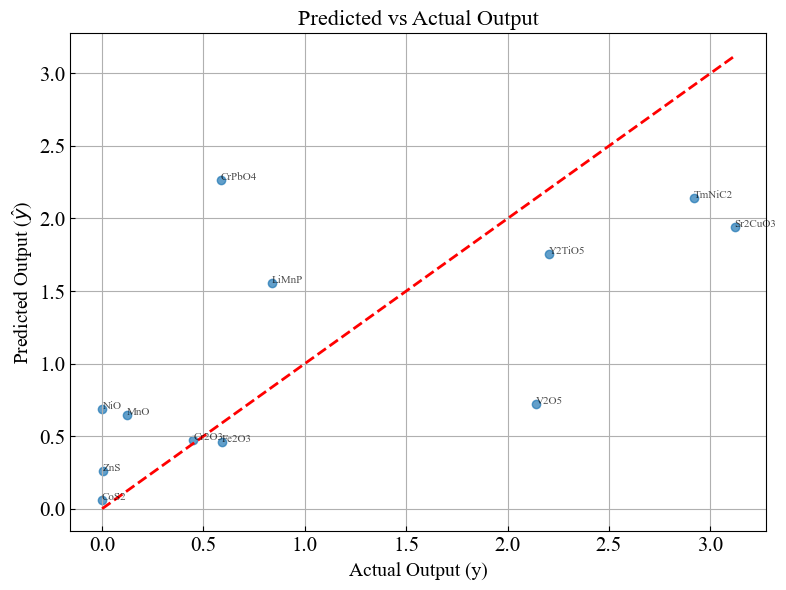

In [136]:
# Predicted output from the model
y_pred = results.predict(X)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

# Annotate each point with its index label
for i, txt in enumerate(y.index):
    plt.annotate(txt, (y[i], y_pred.iloc[i]), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

### Make correlation matrix

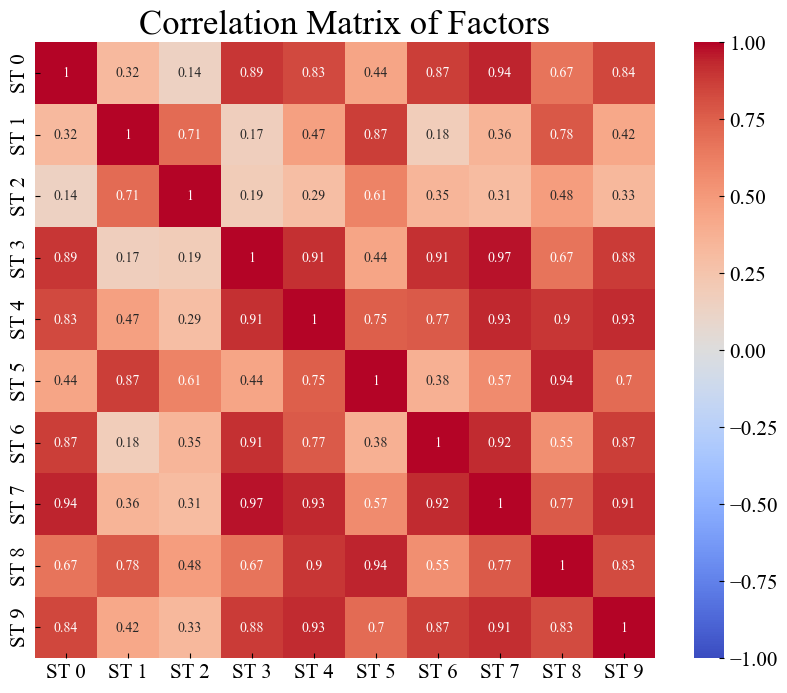

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

X = factor_df[[f'ST {i}' for i in range(10)]]
# X = factor_df[['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']]
# X = factor_df
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Factors")
plt.show()

In [151]:
from pymatgen.core import Composition

# compound_formula = 'PbCrO4'
# compound_formula = 'CuO3'
# compound_formula = 'FeSi2'
compound_formula = 'FeB'
composition = Composition(compound_formula)

# Get oxidation states
oxidation_states = composition.oxi_state_guesses(oxi_states_override={"Al": [-3,-2,-1], "Co":[1,2,3,4,5], "Cu": [1,2,3,4,5,6,7,8], 
"Fe": {1,2,3,4,5,6}, "Si":{-3,-2,-1}, "B":{-5,-4,-3,-2,-1}})

print(f"Possible oxidation states for {compound_formula}:")
for state in oxidation_states:
    print(state)

# Rule 1: Leave oxygen as -2 every time
# Rule 2: Look at the top right of the periodic table {N, O, F, P, S, Cl, As, Se, Br}
# Rule 3: Allow for alternaitves like Pb {1,2,3,4,5} or Ba {1,2,3,4,5}
# Rule 4: Allow the transition metals {Sc-Zn} to have any positive oxidation state

Possible oxidation states for FeB:
{'Fe': 3.0, 'B': -3.0}
{'Fe': 2.0, 'B': -2.0}
{'Fe': 1.0, 'B': -1.0}
{'Fe': 4.0, 'B': -4.0}
{'Fe': 5.0, 'B': -5.0}
